# x19372016 - Jordan O'Donovan

In [31]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
from matplotlib.image import imread

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [15]:
import skimage

In [3]:
model = Sequential()

In [11]:
labels = ['head', 'helmet']

In [18]:
traindf  = pd.read_csv('Data/train/_annotations.csv')

In [19]:
traindf

,filename,width,height,class,xmin,ymin,xmax,ymax
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,301,100,330,135
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,340,121,370,158
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,199,111,223,137
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,277,109,295,132
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,154,116,174,141
...,...,...,...,...,...,...,...,...
19753,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,helmet,248,74,290,131
19754,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,helmet,120,72,152,114
19755,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,helmet,288,70,317,106
19756,004208_jpg.rf.ff41745f0340f82a1b3d76d669e084a7...,640,510,helmet,418,69,639,293


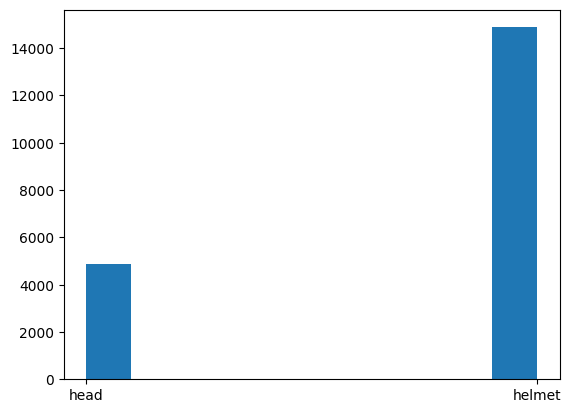

In [29]:
plt.hist(traindf['class'])
plt.show()

In [ ]:
#folder 
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = 'Data/train' + 'dog.' + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()